1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [44 lines of output]
  Traceback (most recent call last):
    File "C:\Users\rokha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\requirements.py", line 35, in __init__
      parsed = _parse_requirement(requirement_string)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rokha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 64, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rokha\anaconda3\Lib\site-packages\setuptools\_vendor\packaging\_parser.py", line 82, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\rokha\anaconda3\Lib\site-packages\setuptools\_v

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [1]:
import tensorflow as tf
import os
import cv2
import time
from matplotlib import pyplot as plt
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False  # Image is no longer writeable
    results = model.process(image)  # Make prediction
    image.flags.writeable = True  # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # COLOR CONVERSION RGB 2 BGR
    return results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_styled_landmarks(image, results):
    if results.pose_landmarks:
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(70, 12, 10), thickness=2, circle_radius=3),
                                   mp_drawing.DrawingSpec(color=(70, 34, 141), thickness=2, circle_radius=2)
                                   )
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=3),
                                   mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                                   )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                   mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=3),
                                   mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
                                   )

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        
        # Make detections using the model
        results = mediapipe_detection(frame, holistic)

        # Check if results are available
        if results is not None and results.left_hand_landmarks is not None:
            # Draw styled landmarks on the frame
            draw_styled_landmarks(frame, results)

            # Show the frame
            cv2.imshow('OpenCV Feed', frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()



In [7]:
cap.release()
cv2.destroyAllWindows()

In [8]:
results.pose_landmarks

landmark {
  x: 0.45392275
  y: 0.38158226
  z: -0.6465271
  visibility: 0.9996494
}
landmark {
  x: 0.48540074
  y: 0.32705307
  z: -0.6210503
  visibility: 0.99889976
}
landmark {
  x: 0.502452
  y: 0.32654732
  z: -0.6209861
  visibility: 0.9991871
}
landmark {
  x: 0.5179359
  y: 0.32677492
  z: -0.6207329
  visibility: 0.99884135
}
landmark {
  x: 0.4400443
  y: 0.3316758
  z: -0.610571
  visibility: 0.9990628
}
landmark {
  x: 0.42655522
  y: 0.334253
  z: -0.610112
  visibility: 0.99939567
}
landmark {
  x: 0.4137674
  y: 0.33800718
  z: -0.61089873
  visibility: 0.9992281
}
landmark {
  x: 0.55419695
  y: 0.37104237
  z: -0.2538471
  visibility: 0.9993083
}
landmark {
  x: 0.40819106
  y: 0.38314286
  z: -0.21149094
  visibility: 0.99956495
}
landmark {
  x: 0.49889308
  y: 0.44722423
  z: -0.5427655
  visibility: 0.9994623
}
landmark {
  x: 0.4385214
  y: 0.44860357
  z: -0.53469646
  visibility: 0.9994247
}
landmark {
  x: 0.6887332
  y: 0.6127041
  z: -0.12513915
  visibilit

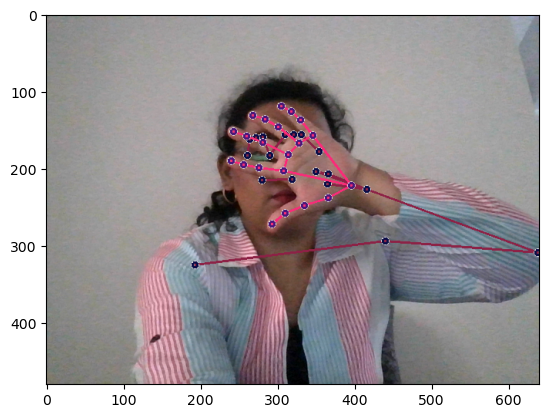

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
import numpy as np
pose=[]
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
len(results.pose_landmarks.landmark)

33

In [12]:
pose

[array([ 0.45392275,  0.38158226, -0.64652711,  0.99964941]),
 array([ 0.48540074,  0.32705307, -0.6210503 ,  0.99889976]),
 array([ 0.50245202,  0.32654732, -0.6209861 ,  0.99918711]),
 array([ 0.51793587,  0.32677492, -0.6207329 ,  0.99884135]),
 array([ 0.44004431,  0.3316758 , -0.61057103,  0.99906278]),
 array([ 0.42655522,  0.33425301, -0.61011201,  0.99939567]),
 array([ 0.4137674 ,  0.33800718, -0.61089873,  0.99922812]),
 array([ 0.55419695,  0.37104237, -0.25384709,  0.99930829]),
 array([ 0.40819106,  0.38314286, -0.21149094,  0.99956495]),
 array([ 0.49889308,  0.44722423, -0.5427655 ,  0.99946231]),
 array([ 0.43852139,  0.44860357, -0.53469646,  0.9994247 ]),
 array([ 0.68873322,  0.6127041 , -0.12513915,  0.99866009]),
 array([ 0.30170712,  0.67894095, -0.11759839,  0.99715513]),
 array([ 0.99805641,  0.64519602, -0.74879861,  0.9926514 ]),
 array([ 0.28178805,  1.03506112, -0.2331886 ,  0.6968075 ]),
 array([ 0.65089691,  0.47347075, -1.10258102,  0.98349863]),
 array([

 Extract Keypoint Values

In [13]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [14]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks is not None else np.zeros(21*4)


In [15]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks is not None else np.zeros(21*3)


In [16]:
Rh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks and results.left_hand_landmarks.landmark is not None else np.zeros(21*3)


In [17]:

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])
    

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.45392275,  0.38158226, -0.64652711, ...,  0.        ,
        0.        ,  0.        ])

In [21]:
result_test.shape

(1662,)

In [22]:
np.save('0', result_test)



In [23]:
np.load('0.npy')

array([ 0.45392275,  0.38158226, -0.64652711, ...,  0.        ,
        0.        ,  0.        ])

Setup Folders for Collection

In [24]:
import os

# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Create the main directory if it doesn't exist
os.makedirs(DATA_PATH, exist_ok=True)

# Create subdirectories for each action
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    os.makedirs(action_path, exist_ok=True)

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30




Collect Keypoint Values for Training and Testing

In [25]:
def mediapipe_detection(frame, holistic):
    image = frame  # Replace this with the actual processing logic
    results = holistic.process(image)  # Replace this with the actual processing logic
    return image, results


In [26]:
import os
import cv2
import numpy as np
import mediapipe as mp

# Continue with your existing code
cap = cv2.VideoCapture(0)

# Set mediapipe model 
mp_holistic = mp.solutions.holistic
holistic = mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# NEW LOOP
# Loop through actions
for action in actions:
    # Loop through sequences aka videos
    for sequence in range(start_folder, start_folder+no_sequences):
        # Loop through video length aka sequence length
        for frame_num in range(sequence_length):
            # Read feed
            ret, frame = cap.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Make detections
            detection_result = mediapipe_detection(frame, holistic)

            # Check if the result is iterable
            if isinstance(detection_result, tuple) and len(detection_result) == 2:
                image, results = detection_result
                # Draw landmarks
                draw_styled_landmarks(image, results)

                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(frame, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)

                # Export keypoints
                keypoints = extract_keypoints(results)

                # Create directories if they don't exist
                save_dir = os.path.join(DATA_PATH, action, str(sequence))
                os.makedirs(save_dir, exist_ok=True)

                npy_path = os.path.join(save_dir, str(frame_num) + '.npy')
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
            else:
                print("Error in mediapipe_detection. Check the function implementation.")

cap.release()
cv2.destroyAllWindows()


 Preprocess Data and Create Labels and Features

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map = {label:num for num, label in enumerate(actions)}

In [29]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [30]:
sequences, labels = [], []

for action in actions:
    for sequence_dir in os.listdir(os.path.join(DATA_PATH, action)):
        try:
            sequence = int(sequence_dir)
            window = []
            for frame_num in range(sequence_length):
                file_path = os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num))
                if os.path.exists(file_path):
                    res = np.load(file_path)
                    window.append(res)
                else:
                    # Handle the case where the file does not exist
                    print(f"Warning: File not found: {file_path}")

            # Append the 'window' list and corresponding label to 'sequences' and 'labels'
            sequences.append(window)
            labels.append(label_map[action])

        except ValueError:
            # Skip directories that cannot be converted to integers
            continue



In [31]:
np.array(sequences).shape

(90, 30, 1662)

In [32]:
np.array(labels).shape

(90,)

In [33]:
X = np.array(sequences)

In [34]:
X.shape

(90, 30, 1662)

In [35]:
y = to_categorical(labels).astype(int)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

Build and Train LSTM Neural Network

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [60]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [61]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [62]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 11s 101ms/step - loss: 1.1007 - categorical_accuracy: 0.4235
Epoch 2/500
3/3 [==============================] - 0s 105ms/step - loss: 10.3909 - categorical_accuracy: 0.3647
Epoch 3/500
3/3 [==============================] - 0s 100ms/step - loss: 10.3430 - categorical_accuracy: 0.3647
Epoch 4/500
3/3 [==============================] - 0s 94ms/step - loss: 6.4329 - categorical_accuracy: 0.3176
Epoch 5/500
3/3 [==============================] - 0s 89ms/step - loss: 9.8244 - categorical_accuracy: 0.3647
Epoch 6/500
3/3 [==============================] - 0s 92ms/step - loss: 11.1416 - categorical_accuracy: 0.2941
Epoch 7/500
3/3 [==============================] - 0s 94ms/step - loss: 13.1172 - categorical_accuracy: 0.3882
Epoch 8/500
3/3 [==============================] - 0s 95ms/step - loss: 11.5714 - categorical_accuracy: 0.3529
Epoch 9/500
3/3 [==============================] - 0s 90ms/step - loss: 21.4197 - categorical_accuracy: 0.2941


In [63]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_45 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_46 (LSTM)              (None, 30, 128)           98816     
                                                                 
 lstm_47 (LSTM)              (None, 30, 128)           131584    
                                                                 
 lstm_48 (LSTM)              (None, 30, 64)            49408     
                                                                 
 lstm_49 (LSTM)              (None, 64)                33024     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)              

Make Predictions

In [64]:
res = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [65]:
actions[np.argmax(res[1])]

'thanks'

In [66]:
actions[np.argmax(y_test[3])]

'hello'

### Save

In [67]:
model.save('action.h5')

C:\Users\rokha\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluation using Confusion Matrix and Accuracy

In [69]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [70]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 31ms/step


In [71]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [72]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[2, 2],
        [0, 1]],

       [[2, 1],
        [1, 1]]], dtype=int64)

In [73]:
accuracy_score(ytrue, yhat)

0.4

Test in Real Time

In [74]:
from scipy import stats

In [75]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [77]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti